In [1]:
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
import warnings

import pandas as pd
import numpy as np

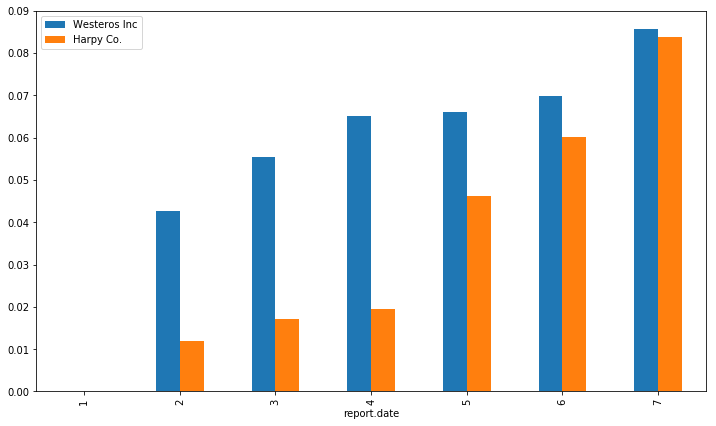

In [2]:
data = read_csv('production-data.csv', ',')
data['diff'] = data['report.date'] - data['production.date']

data_h = data[data.supplier=='harpy.co']
data_w = data[data.supplier=='westeros.inc']

#data1_defects = data1.groupby(['diff', 'unsullen.id']).aggregate({'defects': 'sum', 
#                                                                 'produced': 'sum'})
#data2_defects = data1.groupby(['diff', 'unsullen.id']).aggregate({'defects': 'sum', 
#                                                                 'produced': 'sum'})

data1_summary = data_h.groupby(['diff']).aggregate({'defects': 'sum', 
                                                   'produced': 'sum'})
data2_summary = data_w.groupby(['diff']).aggregate({'defects': 'sum', 
                                                   'produced': 'sum'})
data1_summary_month = data_h.groupby(['report.date']).aggregate({'defects' : 'sum'})
data2_summary_month = data_w.groupby(['report.date']).aggregate({'defects' : 'sum'})
data1_summary_month['current'] = data_h.groupby(['production.date']).aggregate({'produced' : 'sum'})
data2_summary_month['current'] = data_w.groupby(['production.date']).aggregate({'produced' : 'sum'})
data1_summary_month = data1_summary_month.fillna(0)
data2_summary_month = data2_summary_month.fillna(0)
data1_summary_month['percent'] = data1_summary_month['defects'] 
data2_summary_month['percent'] = data2_summary_month['defects'] 

for i in range(2,8):
    data1_summary_month['current'][i] += data1_summary_month['current'][i-1] - data1_summary_month['defects'][i-1]
    data2_summary_month['current'][i] += data2_summary_month['current'][i-1] - data2_summary_month['defects'][i-1]

#data1_summary_month['current'][7] = data1_summary_month['current'][6] - data1_summary_month['defects'][6]
#data2_summary_month['current'][7] = data2_summary_month['current'][6] - data2_summary_month['defects'][6]

for i in range(1,8):
    data1_summary_month['percent'][i] = data1_summary_month['defects'][i] / data1_summary_month['current'][i]
    data2_summary_month['percent'][i] = data2_summary_month['defects'][i] / data2_summary_month['current'][i]
    
data1 = data1_summary.copy()
data2 = data2_summary.copy()
data1['effect'] = data1['produced']
data2['effect'] = data2['produced']
data1['effect'][0] = 0
data2['effect'][0] = 0

for i in range(1,7):
    data1['produced'] [i] = data1['produced'] [i-1] - data1['defects'][i]
    data2['produced'] [i] = data2['produced'] [i-1] - data2['defects'][i]
    data1['effect'] [i] = data1['produced'][i] + 0.5 * data1['defects'][i]
    data2['effect'] [i] = data2['produced'][i] + 0.5 * data2['defects'][i]
    
    

for i in range(7):
    data1_summary['defects'][i] /= (7-i)
    data2_summary['defects'][i] /= (7-i)
defects1 = data1_summary['defects'].sum()
defects2 = data2_summary['defects'].sum()

data1_summary['pc_defects'] = data1_summary['defects'] / defects1
data2_summary['pc_defects'] = data2_summary['defects'] / defects2

data1_summary_month['Westeros Inc'] = data2_summary_month['percent']
data1_summary_month['Harpy Co.'] = data1_summary_month['percent']
data1_summary_month[['Westeros Inc', 'Harpy Co.']].plot(kind='bar', figsize=(12,7));
plt.show()

In [3]:
data1_summary_month

,defects,current,percent,Westeros Inc,Harpy Co.
report.date,,,,,
1,0.0,5248.0,0.000000,0.000000,0.000000
2,126.0,10504.0,0.011995,0.042551,0.011995
3,268.0,15621.0,0.017156,0.055321,0.017156
4,402.0,20635.0,0.019481,0.065040,0.019481
5,1180.0,25476.0,0.046318,0.066073,0.046318
6,1777.0,29556.0,0.060123,0.069735,0.060123
7,2327.0,27779.0,0.083768,0.085689,0.083768


In [4]:
data2

,defects,produced,effect
diff,,,
0,0.0,31625.0,0.0
1,2683.0,28942.0,30283.5
2,2064.0,26878.0,27910.0
3,1505.0,25373.0,26125.5
4,1068.0,24305.0,24839.0
5,667.0,23638.0,23971.5
6,281.0,23357.0,23497.5


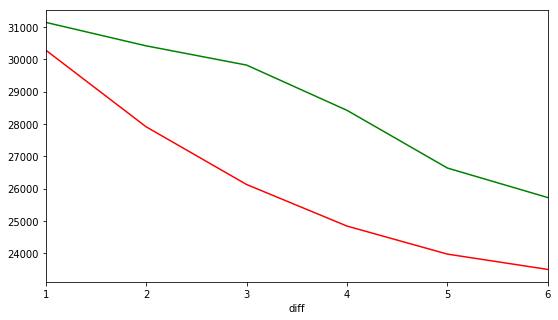

In [5]:
data1['effect'][1:].plot(figsize=(9, 5), color='g')
data2['effect'][1:].plot(figsize=(9, 5), color='r')
plt.show()

In [6]:
data1_summary

,defects,produced,pc_defects
diff,,,
0,0.000000,31532.0,0.000000
1,130.166667,0.0,0.055707
2,134.400000,0.0,0.057518
3,129.750000,0.0,0.055528
4,760.333333,0.0,0.325395
5,645.000000,0.0,0.276036
6,537.000000,0.0,0.229816


In [7]:
data2_summary

,defects,produced,pc_defects
diff,,,
0,0.000000,31625.0,0.000000
1,447.166667,0.0,0.202639
2,412.800000,0.0,0.187065
3,376.250000,0.0,0.170502
4,356.000000,0.0,0.161326
5,333.500000,0.0,0.151130
6,281.000000,0.0,0.127339


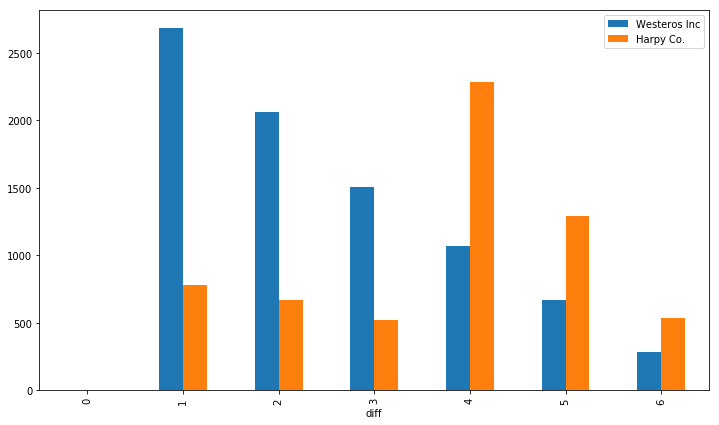

In [8]:
#locs = np.arange(1, len(data1_summary['pc_defects'])+1)
width = 0.54

#fig, ax = plt.axes()
#plt.bar(locs, data1_summary['pc_defects'], width=width)
#plt.bar(locs+width, data2_summary['pc_defects'], width=width, color='red')
#ax.plot(data1_summary['pc_defects'], color='red')
#ax.plot(data2_summary['pc_defects'], color='green')
#print(data_summary)
#data1_summary['Westeros Inc'] = data2_summary['pc_defects']
#data1_summary['Harpy Co.'] = data1_summary['pc_defects']
data1_summary['Westeros Inc'] = data2['defects']
data1_summary['Harpy Co.'] = data1['defects']
data1_summary[['Westeros Inc', 'Harpy Co.']].plot(kind='bar', figsize=(12,7));
plt.show()

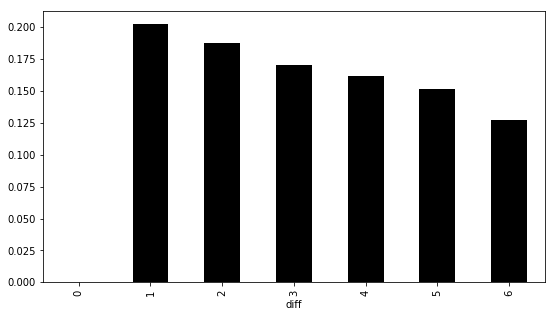

In [9]:
data2_summary['pc_defects'].plot(kind='bar', figsize=(9, 5), color='k')
plt.show()

In [10]:
data1_summary_month

,defects,current,percent,Westeros Inc,Harpy Co.
report.date,,,,,
1,0.0,5248.0,0.000000,0.000000,0.000000
2,126.0,10504.0,0.011995,0.042551,0.011995
3,268.0,15621.0,0.017156,0.055321,0.017156
4,402.0,20635.0,0.019481,0.065040,0.019481
5,1180.0,25476.0,0.046318,0.066073,0.046318
6,1777.0,29556.0,0.060123,0.069735,0.060123
7,2327.0,27779.0,0.083768,0.085689,0.083768


In [11]:
data2_summary_month

,defects,current,percent
report.date,,,
1,0.0,5280.0,0.000000
2,449.0,10552.0,0.042551
3,852.0,15401.0,0.055321
4,1290.0,19834.0,0.065040
5,1573.0,23807.0,0.066073
6,1915.0,27461.0,0.069735
7,2189.0,25546.0,0.085689
